In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
adaboost_train = pd.read_csv("https://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw6/hw2_adaboost_train.dat", header=None, delim_whitespace = True)
ada_train_x = np.array(adaboost_train.iloc[:,:-1])
ada_train_y = np.array(adaboost_train.iloc[:,-1])
adaboost_test = pd.read_csv("https://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw6/hw2_adaboost_test.dat", header=None, delim_whitespace = True)
ada_test_x = np.array(adaboost_test.iloc[:,:-1])
ada_test_y = np.array(adaboost_test.iloc[:,-1])

In [3]:
from sklearn.metrics import zero_one_loss

In [4]:
def decision(u = None):
    best_s = None
    best_i = None
    best_theta = None
    best_e = np.infty
    best_e_in = np.infty
    x_t = ada_train_x.T.copy()
    x_t.sort()
    if u == None:
        u = np.array([1./x_t.shape[1] for i in xrange(x_t.shape[1])] )
    for i in xrange(x_t.shape[0]):
        mid = (x_t[i][:-1]+x_t[i][1:])/2
        theta_vector = np.concatenate([np.array([-np.infty]),mid,np.array([-np.infty]), mid ])
        s_vector = np.concatenate([[1 for _ in xrange(x_t.shape[1])], [-1 for _ in xrange(x_t.shape[1])]])
        for j in xrange(len(theta_vector)):
            theta = theta_vector[j]
            s = s_vector[j]
            g = s*np.sign(ada_train_x.T[i]-theta)
            e = np.sum(u[g!=ada_train_y])/np.sum(u)
            e_in = zero_one_loss(ada_train_y, g)
            if e<best_e:
                best_s = s
                best_theta = theta
                best_i = i
                best_e = e
                best_e_in = e_in
    return best_s, best_i, best_theta, best_e, best_e_in

In [5]:
decisions = []
diamonds = []
u0=np.array([1. for i in xrange(ada_train_x.shape[0])])/ada_train_x.shape[0]
u = [u0]
for t in range(300):
    decisions.append(decision(u[t]))
    (s,i,theta,e, e_in) = decisions[t]
    g = s*np.sign(ada_train_x.T[i]-theta)
    diamond = np.sqrt((1-e)/e)
    diamonds.append(diamond)
    if t < 300-1:
        u_new = u[-1].copy()
        u_new[g==ada_train_y] = u_new[g==ada_train_y]/diamond
        u_new[g!=ada_train_y] = u_new[g!=ada_train_y]*diamond
        u.append(u_new)
np.array(diamonds)
alpha = np.log(diamonds)

C:\Users\Chung-You\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [6]:
result = pd.DataFrame(decisions, columns = ["s", "i", "theta", "e", "e_in"])

# Problem 12

E_in(g_1) = 0.24
alpha_1 = 0.576339754969


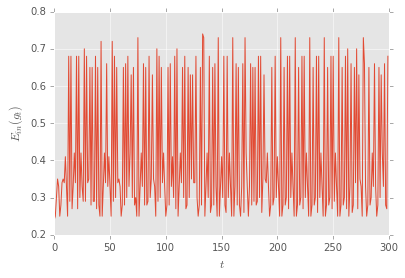

In [7]:
print "E_in(g_1) =", result["e_in"][0]
print "alpha_1 =", alpha[0]
plt.plot(result["e_in"])
plt.xlabel(r"$t$")
plt.ylabel(r"$E_{in}(g_t)$")
plt.savefig("p12")

In [8]:
def classify(x, t = None):
    if not t:
        t = 300
    gs = []
    for d in decisions[:t]:
        (s,i,theta,e, e_in) = d
        g = s*np.sign(x.T[i]-theta)
        gs.append(g)
    gs = np.array(gs)
    return np.sign(np.dot(alpha[:t], gs))

# Problem 14

In [9]:
E_in_14 = []
E_in_14 = [zero_one_loss(classify(ada_train_x, i+1), ada_train_y) for i in range(300)]

E_in(G) = 0.0


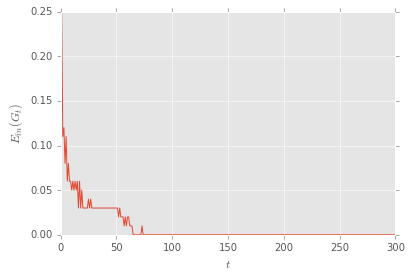

In [10]:
print "E_in(G) =", E_in_14[-1]
plt.plot(E_in_14)
plt.xlabel(r"$t$")
plt.ylabel(r"$E_{in}(G_t)$")
plt.savefig("p14")

# Problem 15

U_2= 0.854166260163
U_T= 0.00546512411935


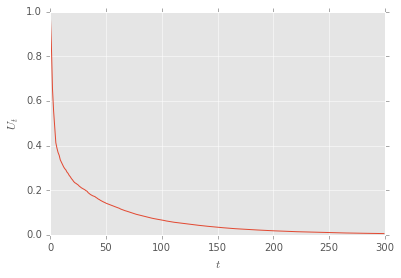

In [11]:
U = np.sum(u, axis = 1)
print "U_2=", U[2-1]
print "U_T=", U[-1]
plt.plot(U)
plt.xlabel(r"$t$")
plt.ylabel(r"$U_t$")
plt.savefig("p15")

# Problem16

min(epsilon_t)= 0.178728070175


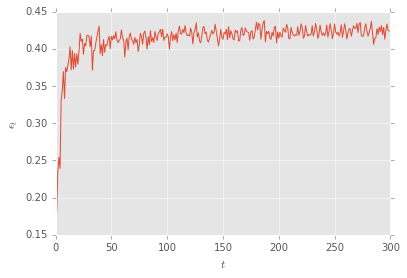

In [12]:
print "min(epsilon_t)=", np.min(result["e"])
plt.plot(result["e"])
plt.xlabel(r"$t$")
plt.ylabel(r"$\epsilon_t$")
plt.savefig('p16')

# Problem 17

In [13]:
E_in_17 = []
for t in range(300):
    d = decisions[t]
    (s,i,theta,e, e_in) = d
    g = s*np.sign(ada_test_x.T[i]-theta)
    E_in_17.append(zero_one_loss(g,ada_test_y))

E_out(g_1) = 0.29


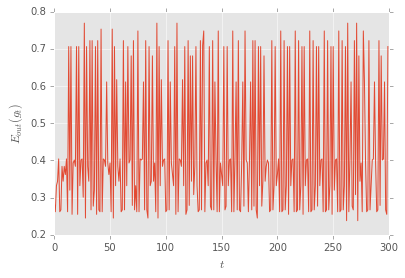

In [14]:
print "E_out(g_1) =", E_in_17[0]
plt.plot(E_in_17)
plt.xlabel(r"$t$")
plt.ylabel(r"$E_{out}(g_t)$")
plt.savefig("p17")

# Problem18

In [15]:
E_in_18 = [zero_one_loss(classify(ada_test_x, i+1), ada_test_y) for i in range(300)]

E_out(G_T) = 0.132


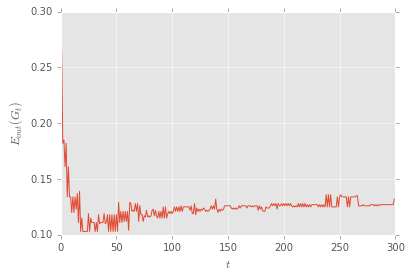

In [16]:
plt.plot(E_in_18)
print "E_out(G_T) =", E_in_18[-1]
plt.xlabel(r"$t$")
plt.ylabel(r"$E_{out}(G_t)$")
plt.savefig("p18")